Data Mining: Basic Concepts - WS'19/20 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Dr. Johannes Fuchs, Eren Cakmak, Frederik Dennig
```

---

#### Exercise 1: PCA - _(6 Points)_

We want to apply the principal component analysis (PCA) to the following ``numpy.array`` data. Continue with the following steps in order to calculate the PCA manually. Do not use any libraries for this task. You may however use any ``numpy`` and ``pandas`` method.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

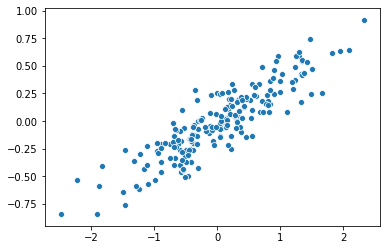

In [2]:
reg = np.random.RandomState(1)
arr = np.dot(reg.rand(2, 2), reg.randn(2, 200)).T
sns.scatterplot(x = arr[:,0], y = arr[:,1])
plt.show()

##### __(a) Subtract the mean of the attributes__

In [3]:
x_mean = arr[:,0].mean()
x_sub = arr[:,0] - x_mean
# Mean should be zero by now (or very close to it)
print('(new) X mean: {:.8f}'.format(x_sub.mean()))

y_mean = arr[:,1].mean()
y_sub = arr[:,1] - y_mean
# Mean should be zero by now (or very close to it)
print('(new) Y mean: {:.8f}'.format(y_sub.mean()))

(new) X mean: -0.00000000
(new) Y mean: -0.00000000


##### __(b) Compute the covariance matrix__ _(Hint: use ``numpy.cov()``)_

In [4]:
cov_mat = np.cov(x_sub, y_sub)
print(cov_mat)

[[0.68217761 0.23093475]
 [0.23093475 0.09883179]]


##### __(c) Determine the eigenvalues/eigenvectors of the matrix__ _(Hint: use ``numpy.linalg.eig()``)_

In [5]:
w, v = np.linalg.eig(cov_mat)
print(w)
print(v)

[0.7625315 0.0184779]
[[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]


##### __(d) Transform the data using the eigenvectors and plot the result.__

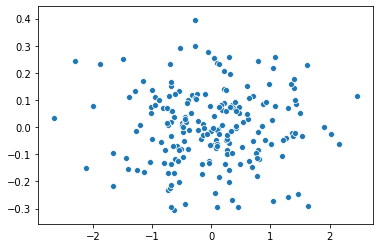

In [6]:
w1 = (v[0,0] * x_sub) + (v[1,0] * y_sub)
w2 = (v[0,1] * x_sub) + (v[1,1] * y_sub)

sns.scatterplot(w1, w2)
plt.show()

##### __(e) Name the percentage of the data variance that the first principle component already covers. (Calculate the ratio between the first eigenvalue and the sum of all eigenvalues)__

In [7]:
cover = round(((w[0]/(w[0] + w[1])) * 100), 2)
print('The first principle component covers {}% of the data variance.'.format(cover))

The first principle component covers 97.63% of the data variance.


##### __(f) Imagine you have a dataset with 4 attributes. How many Eigenvalues would you get during step c?__

> **4**  
> Always as much as dimensions/attributes.

---

#### Exercise 2: Linear Interpolation - _(4 Points)_
Given the following dataset: 

In [8]:
import pandas as pd 
import numpy as np

df = pd.DataFrame(np.array([[1, 3],
                            [3, 8],
                            [5, 12]]),
                  columns=['time', 'temperature'])
print(df)

   time  temperature
0     1            3
1     3            8
2     5           12


##### __(a) Implement a method that takes any non-existing hour of the day (x) in the dataset (e.g., x = 4) between two existing values and gives the corresponding Temperature (y). Use linear interpolation for that (see formula below).__ 

$ y = y_1 + (y_2 - y_1) * \frac{x - x_1}{x_2 - x_1}$

_(Hint: x and y are the values you are looking for to fill any non-existing pair of time and corresponding temperature. The other elements in the formula you should get from the existing data.)_

In [9]:
def linear_interpolation(df, new_x):
    df.sort_values('time', inplace=True)
    
    # Select the largest x/y value smaller then the to-be-imputed one  -  next bigger x/y
    x1 = df[df['time'] < new_x].max()[0]
    y1 = df[df['time'] < new_x].max()[1]
    
    # Select the smallest x/y value bigger then the to-be-imputed one  -  next smaller x/y
    x2 = df[df['time'] > new_x].min()[0]
    y2 = df[df['time'] > new_x].min()[1]
    
    # Compute new_y to given new_x usen the given formula for linear interpolation
    new_y = y1 + (y2-y1) * ((new_x-x1) / (x2-x1))
    
    # Add new values as a new row to the data and resort (and reindex) it
    new_data = pd.DataFrame(np.array([[new_x, new_y]]), columns=['time', 'temperature'])
    df = df.append(new_data, ignore_index=True)
    df.sort_values('time', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    return(df)

##### __(b)  Use your method from (a) to interpolate and create new data points for ``x = 2`` and ``x = 4``. Visualize in a scatter plot the provided dataset and the two new data points you just created.__

In [10]:
import seaborn as sns

In [11]:
df = linear_interpolation(df, 2)
df = linear_interpolation(df, 4)
print(df)

   time  temperature
0   1.0          3.0
1   2.0          5.5
2   3.0          8.0
3   4.0         10.0
4   5.0         12.0


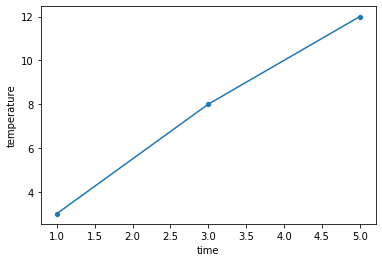

In [12]:
# I prefer a stepwise visualization, therefore:
# Plot the old data
sns.scatterplot(x=df['time'][[0,2,4]],
                y=df['temperature'][[0,2,4]])
sns.lineplot(x=df['time'][[0,2,4]],
             y=df['temperature'][[0,2,4]])
plt.show()

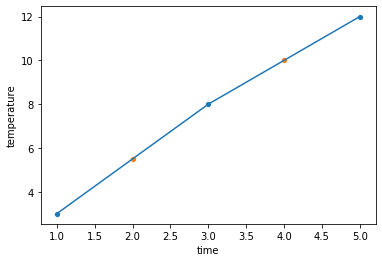

In [13]:
# Still first the old data
sns.scatterplot(x=df['time'][[0,2,4]],
                y=df['temperature'][[0,2,4]])
sns.lineplot(x=df['time'][[0,2,4]],
             y=df['temperature'][[0,2,4]])

# Now highlight the new imputed data
sns.scatterplot(x=df['time'][[1,3]],
                y=df['temperature'][[1,3]])
plt.show()

---

#### Exercise 3: Decision Tree - _(6 Points)_
You need to decide whether an incoming E-Mail is spam or not. The following attributes are stored for each E-Mail: TimeZone, GeoLocation, SuspiciousSubject, SuspiciousBody.

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|NoSpam|
|2|US|US|No|No|NoSpam|
|3|EU|US|No|Yes|Spam|
|4|AS|EU|No|Yes|Spam|
|5|AS|AS|Yes|Yes|Spam|
|6|AS|AS|Yes|No|NoSpam|
|7|EU|AS|Yes|No|Spam|
|8|US|EU|No|Yes|NoSpam|
|9|US|AS|Yes|Yes|Spam|
|10|AS|EU|Yes|Yes|Spam|
|11|US|EU|Yes|No|Spam|
|12|EU|EU|No|No|Spam|
|13|EU|US|Yes|Yes|Spam|
|14|AS|EU|No|No|NoSpam|

##### __Construct a decision tree based on the data of Table 2 by hand. Use the Information Gain as impurity measure. Multiple splits are allowed. If all records in one leave share the same class label, your tree has to terminate.__
__Comment on the steps you performed to create the de-cision tree. Show the results of your calculations and draw plot the final decision tree using.__ 

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. Use this to include the created or handdrawn plot of the decision tree. Do not forget to also upload the image in your final submission.)_

> ***See attached pictures:***

<img src='Graphs/Ass01_DecTree_I.jpg' alt='Calculations: Ass01_DecTree_I.jpg'/>

<img src='Graphs/Ass01_DecTree_II.png' alt='Results: Ass01_DecTree_II.png' width='700'/>

---

#### Exercise 4: Decision Tree in Python - _(4 Points)_
In this task we will train and display a decision tree for the ``iris.csv`` data in Python. Only use the already imported packages for the each task. 

The classes of the flowers are mapped to numbers as follows: ``Iris-Setosa = 0``, ``Iris-Versicolour = 1``, ``Iris-Virginica = 2``

In [16]:
import pandas as pd 
from sklearn import tree

df = pd.read_csv('Data/iris.csv')

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

##### __(a) Create a decision tree using the information gain and train the decision tree with the iris data. Use the ``species`` column as the target variable__ 

In [17]:
# Criterion='entropy' for using information gain instead of default gini
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

##### __(b) Display the decision tree from (a). Explain the result in the following markdown cell.__
##### _(Hint: use the ``sklearn.tree.plot_tree`` or the ``sklearn.tree.export_graphviz`` method)_

[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue

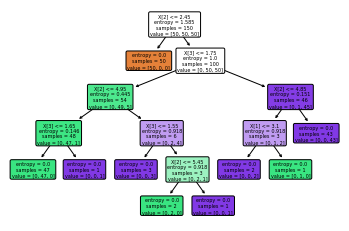

In [18]:
# Create the tree, added color and roundness for better visualization
tree.plot_tree(clf,
               filled=True,
               rounded=True)

> Because this is very small and I can not find out  
> how to zoom it (changing font size makes it worse)  
> I use the following package *graphviz* to display the exact same  
> tree once again in a reasonable size:

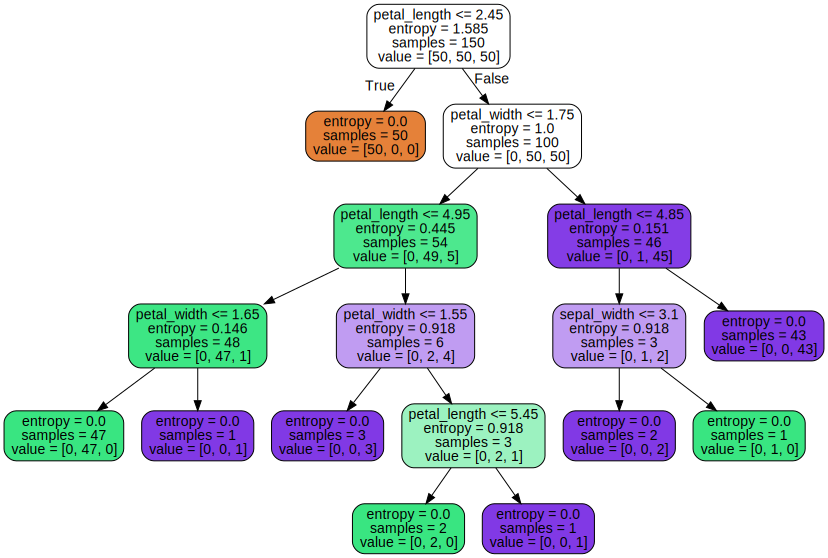

In [19]:
import graphviz

tree_data = tree.export_graphviz(clf,
                                 feature_names=list(X),
                                 filled=True,
                                 rounded=True)
graph = graphviz.Source(tree_data)  
graph

> The **first split** should be done on `petal_length`.  
> In this, the criterion is whether the length is below/equal `2.45` or higher than that.  
> If the petal's length is below or equal to 2.45, the iris-setosas can be perfectly separated  
> from the remaining flowers in the dataset. This happening to all 50 setosa's, therefore the  
> entropy in that leaf is zero; this is a node now.  
>  
> The remaining 100 flowers shall be on **second split** at `petal_width`.  
> It therefore has an entropy of 1 (50/50 distribution). If the petal's width is above `1.75`,  
> 45 of the 46 observations are a iris-virginica. Only one iris-versicolour has that width.  
> Therefore, the entropy of that group is reduced to 0.151 by the previous splits.  
> If the petal's width is below or equal to 1.75, 49 of the remaining 55 observations are versicolours.  
> 
> This remaining group of 55 can be in a **third split** divided on `petal_length`, again.  
> In this, the further decision is made up upon whether the length is below or equal to `4.95` or not.  
>  
> The rest of the tree is interpreted in the same pattern, I hope this is already enough explanation.

----

>  
> **General Remarks**  
> Left arrow equals `True` while right arrows equal `False` to the corresponding split-measurement.  
> There are binary splits only, therefore attributes are not removed from the list after a single split.  
> 
> The lower the entropy (=more "pure" the class) the more saturated the color of the cell is.  
> The orange leaf does identify the pure group of setosas. The more green the leaf/node,  
> the purer it consists of versicolours. The more purple the leaf/node, the purer it consists of  
> verginicas.  
> Since depth is not limited in the construction, each branch ends in a pure node.

---